![image info](https://ineuron.ai/images/ineuron-logo.png)

<span style="color:#800080;font-size:30px"> * Decision Tree Regressor by Jecky Master *

In [36]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("household_power_consumption.csv", sep = ';')
data

C:\Users\Jecky\AppData\Local\Temp\ipykernel_16184\261445848.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("household_power_consumption.csv", sep = ';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [3]:
df = data.sample(50000)

In [4]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
581645,24/1/2008,15:29:00,0.406,0.138,246.450,1.800,0.000,0.000,0.0
377511,4/9/2007,21:15:00,3.694,0.000,234.140,16.200,1.000,32.000,0.0
910551,9/9/2008,01:15:00,1.308,0.072,240.060,5.400,0.000,0.000,18.0
269106,21/6/2007,14:30:00,0.188,0.112,239.970,0.800,0.000,1.000,0.0
1683425,27/2/2010,18:29:00,2.966,0.170,236.240,13.000,14.000,0.000,18.0
...,...,...,...,...,...,...,...,...,...
220018,18/5/2007,12:22:00,0.376,0.138,234.950,1.600,0.000,1.000,0.0
990296,3/11/2008,10:20:00,1.614,0.078,242.880,6.600,0.000,0.000,18.0
1240316,26/4/2009,01:20:00,0.466,0.000,243.130,2.000,0.000,0.000,1.0
1000242,10/11/2008,08:06:00,2.352,0.076,239.250,9.800,0.000,0.000,18.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 581645 to 606496
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   50000 non-null  object 
 1   Time                   50000 non-null  object 
 2   Global_active_power    50000 non-null  object 
 3   Global_reactive_power  50000 non-null  object 
 4   Voltage                50000 non-null  object 
 5   Global_intensity       50000 non-null  object 
 6   Sub_metering_1         50000 non-null  object 
 7   Sub_metering_2         50000 non-null  object 
 8   Sub_metering_3         49340 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


* **There is a problem something in Sub_metering_3 column**

In [6]:
df.drop(columns=['Date', 'Time'], axis = 1, inplace=True)

In [7]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
581645,0.406,0.138,246.450,1.800,0.000,0.000,0.0
377511,3.694,0.000,234.140,16.200,1.000,32.000,0.0
910551,1.308,0.072,240.060,5.400,0.000,0.000,18.0
269106,0.188,0.112,239.970,0.800,0.000,1.000,0.0
1683425,2.966,0.170,236.240,13.000,14.000,0.000,18.0


In [8]:
df['Global_active_power'].unique()

array(['0.406', '3.694', '1.308', ..., 5.154, '4.072', 0.902],
      dtype=object)

In [9]:
df['Global_reactive_power'].unique()

array(['0.138', '0.000', '0.072', '0.112', '0.170', '0.050', '0.074',
       '0.108', '0.060', '0.222', '0.304', '0.342', '0.256', '0.104',
       '0.118', '0.046', '0.146', '0.126', '0.216', '0.094', '0.228',
       '0.542', '0.420', '0.086', '0.184', '0.174', '?', '0.178', '0.292',
       '0.310', '0.056', '0.062', '0.162', '0.088', '0.100', '0.114',
       '0.102', '0.158', '0.098', '0.144', '0.262', '0.110', '0.192',
       '0.194', '0.116', '0.234', '0.142', '0.058', '0.068', '0.316',
       '0.080', '0.396', '0.120', '0.156', '0.048', '0.236', '0.122',
       '0.066', '0.140', '0.334', '0.136', '0.150', '0.132', '0.130',
       '0.154', '0.092', '0.242', '0.252', '0.082', '0.270', '0.096',
       '0.064', 0.054, '0.226', '0.124', '0.188', '0.390', '0.562',
       '0.128', '0.322', '0.266', '0.078', '0.134', '0.076', '0.274',
       '0.214', '0.394', '0.232', '0.204', '0.260', '0.238', '0.084',
       '0.354', '0.070', 0.17, '0.202', '0.090', '0.416', '0.308',
       '0.302', 0.07

In [10]:
df['Voltage'].unique()

array(['246.450', '234.140', '240.060', ..., 237.66, 230.92, 243.54],
      dtype=object)

In [11]:
df['Global_intensity'].unique()

array(['1.800', '16.200', '5.400', '0.800', '13.000', '6.200', '1.600',
       '1.400', '1.200', '3.000', '3.800', '4.600', '2.400', '1.000',
       '0.400', '5.600', '0.600', '2.000', '6.600', '4.400', '6.800',
       '15.400', '10.600', '2.200', '?', '4.000', '2.800', '7.200',
       '14.600', '5.200', '7.800', '7.400', '3.400', '5.800', '5.000',
       '3.200', '6.400', '6.000', '0.200', '14.000', '15.800', '15.200',
       '12.800', '15.000', '4.800', '17.400', '2.600', '15.600', '10.800',
       '14.200', '9.000', '7.600', 5.6, '8.200', '16.400', '13.800',
       '4.200', '12.200', '8.000', '3.600', 6.2, '13.600', '7.000',
       '11.200', '8.400', '18.400', 1.8, '12.000', '11.000', 6.4,
       '12.600', 6.6, '9.200', '21.600', '8.600', '9.800', '10.200', 4.0,
       '9.400', '8.800', 1.0, '26.000', '12.400', '10.400', '10.000',
       '9.600', '20.000', '19.000', '17.200', '20.200', '11.600',
       '19.600', '17.800', '21.000', 5.4, 7.8, '19.400', '24.200',
       '19.800', 2.2,

In [12]:
df['Sub_metering_1'].unique()

array(['0.000', '1.000', '14.000', '39.000', '?', '38.000', '37.000',
       '32.000', '47.000', '36.000', 0.0, 1.0, '13.000', '2.000', '8.000',
       '16.000', '11.000', '18.000', '40.000', '41.000', '43.000',
       '42.000', '35.000', 27.0, '15.000', '12.000', 2.0, '27.000',
       '19.000', '68.000', '26.000', '25.000', 15.0, '48.000', '34.000',
       '23.000', 47.0, '5.000', 29.0, '9.000', 37.0, '4.000', '73.000',
       '10.000', '33.000', 14.0, '3.000', 38.0, '22.000', '17.000',
       '30.000', '21.000', '44.000', '7.000', '20.000', '29.000',
       '28.000', 36.0, '31.000', 32.0, '62.000', 9.0, 18.0, '79.000',
       '59.000', '56.000', 43.0, '24.000', '6.000', '74.000', 16.0, 4.0,
       '75.000', 20.0, '45.000', '52.000', 24.0, '63.000', '55.000', 31.0,
       '77.000', 52.0, '54.000', '71.000', 30.0, '76.000', 8.0, 12.0,
       '49.000', '72.000', '53.000', '46.000', '57.000', '81.000', 34.0,
       28.0], dtype=object)

In [13]:
df['Sub_metering_2'].unique()

array(['0.000', '32.000', '1.000', '2.000', '37.000', '?', '29.000', 0.0,
       '8.000', '3.000', '35.000', '23.000', 1.0, '4.000', '36.000',
       '19.000', '38.000', '21.000', '10.000', '5.000', '25.000',
       '33.000', '31.000', '20.000', 39.0, 2.0, '28.000', '73.000',
       '27.000', '12.000', '60.000', '34.000', '30.000', '6.000', 7.0,
       '54.000', '71.000', '24.000', '17.000', '18.000', '26.000',
       '39.000', '16.000', '7.000', '72.000', 70.0, '64.000', '66.000',
       '75.000', '53.000', '14.000', '59.000', '43.000', 16.0, '40.000',
       '76.000', '41.000', '13.000', '65.000', '9.000', '15.000',
       '62.000', '22.000', 4.0, 3.0, 36.0, 38.0, '69.000', '11.000',
       '74.000', 67.0, '49.000', 35.0, '51.000', '70.000', 37.0, '63.000',
       '42.000', '61.000', '55.000', '78.000', '79.000', '44.000',
       '68.000', 74.0, 10.0, '67.000', 75.0, '48.000', 71.0, '56.000',
       6.0, '46.000', '58.000'], dtype=object)

In [14]:
df['Sub_metering_3'].unique()

array([ 0., 18.,  1.,  4., nan, 19., 17., 16., 15., 13., 26., 11.,  6.,
        7., 29., 12., 10.,  2., 20.,  9.,  3., 30., 28.,  8.,  5., 22.,
       25., 14., 21., 23., 27., 24., 31.])

* **There is a special character '?' in the column like "Sub_metering_1, Sub_metering_2, Global_intensity, Global_reactive_power, voltage"need to drop those rows.**

In [15]:
df.loc[df['Global_reactive_power']=='?']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
193388,?,?,?,?,?,?,NaN
1985980,?,?,?,?,?,?,NaN
1398047,?,?,?,?,?,?,NaN
1935433,?,?,?,?,?,?,NaN
1930367,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...
1986088,?,?,?,?,?,?,NaN
1713781,?,?,?,?,?,?,NaN
1713532,?,?,?,?,?,?,NaN
1986998,?,?,?,?,?,?,NaN


In [16]:
df.drop(df.loc[df['Global_reactive_power']=='?'].index, inplace=True)

In [17]:
df.loc[df['Global_reactive_power']=='?']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [18]:
df.loc[df['Global_active_power']=='?']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [19]:
df.loc[df['Global_intensity']=='?']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [20]:
df.loc[df['Sub_metering_3']=='?']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [21]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49340 entries, 581645 to 606496
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49340 non-null  object 
 1   Global_reactive_power  49340 non-null  object 
 2   Voltage                49340 non-null  object 
 3   Global_intensity       49340 non-null  object 
 4   Sub_metering_1         49340 non-null  object 
 5   Sub_metering_2         49340 non-null  object 
 6   Sub_metering_3         49340 non-null  float64
dtypes: float64(1), object(6)
memory usage: 3.0+ MB


* **Need to change theh dtype of all accept sub metering 3**

In [23]:
df = df.astype({'Global_active_power':float, 'Voltage':float, 'Global_intensity':float, 'Sub_metering_1':float, 'Sub_metering_2':float, 'Global_reactive_power':float})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49340 entries, 581645 to 606496
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49340 non-null  float64
 1   Global_reactive_power  49340 non-null  float64
 2   Voltage                49340 non-null  float64
 3   Global_intensity       49340 non-null  float64
 4   Sub_metering_1         49340 non-null  float64
 5   Sub_metering_2         49340 non-null  float64
 6   Sub_metering_3         49340 non-null  float64
dtypes: float64(7)
memory usage: 3.0 MB


* **Make a single target feature from three differnt features**

In [25]:
df["Sub_metering_all"]=df["Sub_metering_1"]+df["Sub_metering_2"]+df["Sub_metering_3"]

In [26]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_all
581645,0.406,0.138,246.45,1.8,0.0,0.0,0.0,0.0
377511,3.694,0.000,234.14,16.2,1.0,32.0,0.0,33.0
910551,1.308,0.072,240.06,5.4,0.0,0.0,18.0,18.0
269106,0.188,0.112,239.97,0.8,0.0,1.0,0.0,1.0
1683425,2.966,0.170,236.24,13.0,14.0,0.0,18.0,32.0
...,...,...,...,...,...,...,...,...
220018,0.376,0.138,234.95,1.6,0.0,1.0,0.0,1.0
990296,1.614,0.078,242.88,6.6,0.0,0.0,18.0,18.0
1240316,0.466,0.000,243.13,2.0,0.0,0.0,1.0,1.0
1000242,2.352,0.076,239.25,9.8,0.0,0.0,18.0,18.0


* **Dropping extra columns**

In [27]:
df.drop(columns=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], axis = 1, inplace=True)

In [28]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_all
581645,0.406,0.138,246.45,1.8,0.0
377511,3.694,0.000,234.14,16.2,33.0
910551,1.308,0.072,240.06,5.4,18.0
269106,0.188,0.112,239.97,0.8,1.0
1683425,2.966,0.170,236.24,13.0,32.0
...,...,...,...,...,...
220018,0.376,0.138,234.95,1.6,1.0
990296,1.614,0.078,242.88,6.6,18.0
1240316,0.466,0.000,243.13,2.0,1.0
1000242,2.352,0.076,239.25,9.8,18.0


In [29]:
df.duplicated().sum()

211

In [30]:
df.drop_duplicates()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_all
581645,0.406,0.138,246.45,1.8,0.0
377511,3.694,0.000,234.14,16.2,33.0
910551,1.308,0.072,240.06,5.4,18.0
269106,0.188,0.112,239.97,0.8,1.0
1683425,2.966,0.170,236.24,13.0,32.0
...,...,...,...,...,...
220018,0.376,0.138,234.95,1.6,1.0
990296,1.614,0.078,242.88,6.6,18.0
1240316,0.466,0.000,243.13,2.0,1.0
1000242,2.352,0.076,239.25,9.8,18.0


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,49340.0,1.093148,1.058751,0.078,0.310,0.608,1.528,9.732
Global_reactive_power,49340.0,0.123520,0.113493,0.000,0.048,0.100,0.194,1.274
Voltage,49340.0,240.842607,3.256072,224.820,238.970,241.040,242.890,252.940
Global_intensity,49340.0,4.633231,4.450145,0.200,1.400,2.600,6.400,42.800
Sub_metering_all,49340.0,8.931759,13.001191,0.000,0.000,1.000,18.000,131.000


* **The data has been cleaned**

In [44]:
x = df.drop('Sub_metering_all', axis=1)
y = df['Sub_metering_all']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [46]:
x_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
1991453,1.418,0.000,241.34,5.8
385012,0.110,0.000,240.41,0.6
1807918,0.210,0.000,240.61,1.0
681965,2.122,0.000,238.23,8.8
1320099,2.014,0.406,241.47,9.0


In [47]:
y_train.head()

1991453    21.0
385012      0.0
1807918     1.0
681965     17.0
1320099    17.0
Name: Sub_metering_all, dtype: float64

In [48]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [49]:
model.fit(x_train, y_train) 

DecisionTreeRegressor()

In [50]:
model.score(x_train, y_train)

0.9999085326717689

[Text(0.5, 0.9166666666666666, 'X[0] <= 1.183\nsquared_error = 168.836\nsamples = 33057\nvalue = 8.941'),
 Text(0.25, 0.75, 'X[3] <= 3.3\nsquared_error = 5.159\nsamples = 19301\nvalue = 1.144'),
 Text(0.125, 0.5833333333333334, 'X[1] <= 0.139\nsquared_error = 0.977\nsamples = 17460\nvalue = 0.771'),
 Text(0.0625, 0.4166666666666667, 'X[1] <= 0.069\nsquared_error = 0.753\nsamples = 12438\nvalue = 0.575'),
 Text(0.03125, 0.25, 'X[0] <= 0.239\nsquared_error = 0.375\nsamples = 6451\nvalue = 0.396'),
 Text(0.015625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.046875, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.25, 'X[3] <= 2.9\nsquared_error = 1.088\nsamples = 5987\nvalue = 0.768'),
 Text(0.078125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.109375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1875, 0.4166666666666667, 'X[1] <= 0.233\nsquared_error = 1.2\nsamples = 5022\nvalue = 1.257'),
 Text(0.15625, 0.25, 'X[3] <= 2.3\nsquared_error = 1.283\nsamples = 3155\nvalue = 1.

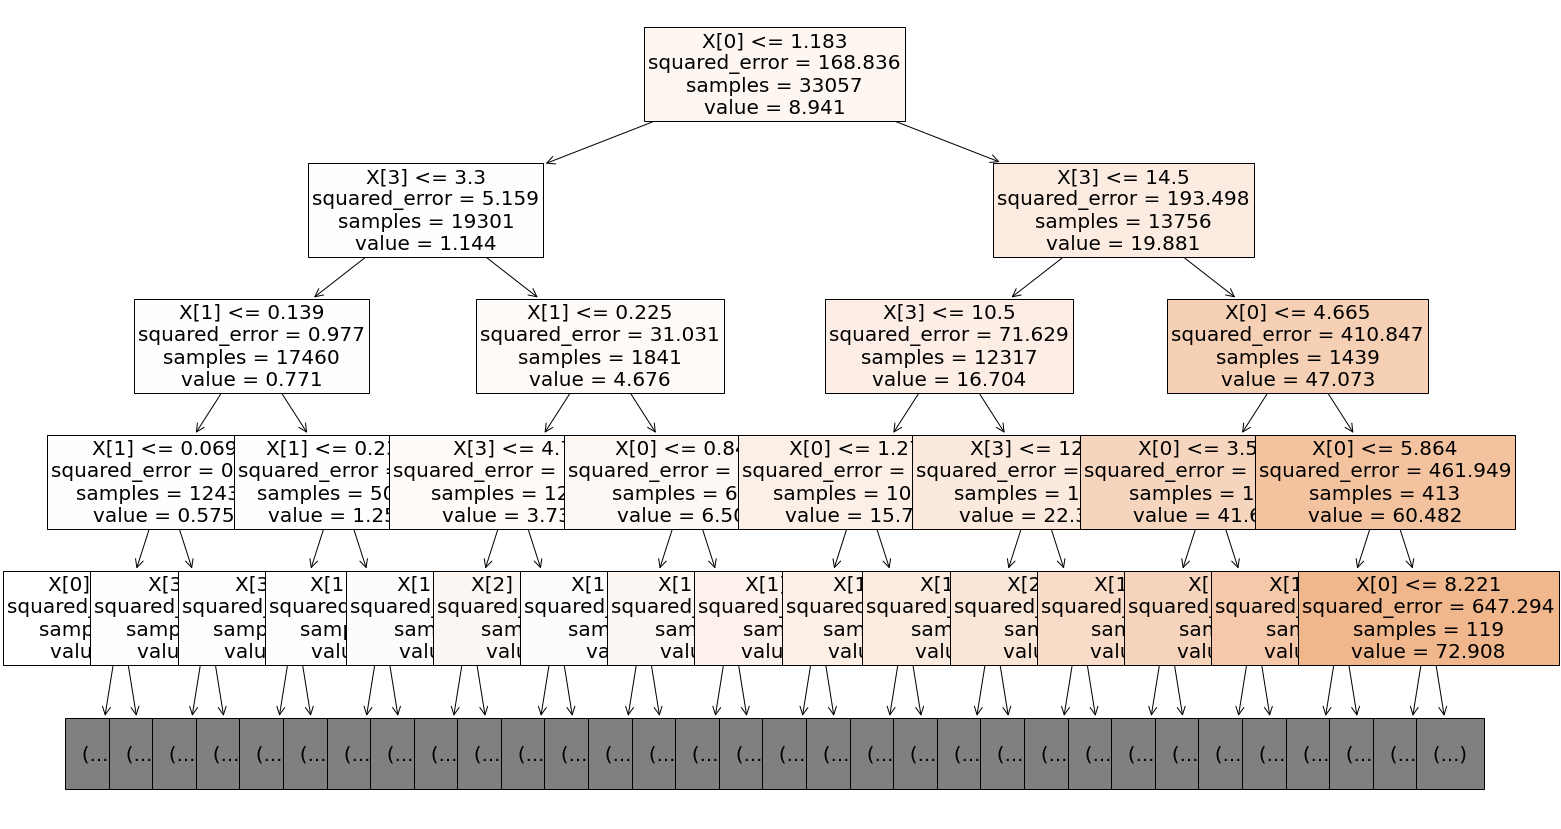

In [57]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4,filled=True, fontsize=20)

In [51]:
y_pred = model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [53]:
a_score = r2_score(y_test, y_pred) 
a_score

0.5865141929132525

# <span style="color:#3cb371">The Accuracy without Hyper Parameter Tuning is 58 %

In [67]:
from sklearn.model_selection import GridSearchCV
  
grid_param = {
    'criterion': ["squared_error"],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
}

In [68]:
gridsearch = GridSearchCV(estimator=model,param_grid=grid_param, cv =3 ,verbose=1)

In [69]:
gridsearch.fit(x_train, y_train)

Fitting 3 folds for each of 672 candidates, totalling 2016 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [70]:
gridsearch.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'splitter': 'random'}

In [73]:
model_with_best_params=DecisionTreeRegressor(criterion= 'squared_error',
                                             max_depth= 9,
                                             min_samples_leaf= 6,
                                             min_samples_split= 6,
                                             splitter= 'random')

In [74]:
model_with_best_params.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=6,
                      splitter='random')

[Text(0.6559095036319612, 0.95, 'X[3] <= 3.021\nsquared_error = 168.836\nsamples = 33057\nvalue = 8.941'),
 Text(0.4231991525423729, 0.85, 'X[1] <= 0.215\nsquared_error = 0.864\nsamples = 17188\nvalue = 0.756'),
 Text(0.2508323244552058, 0.75, 'X[1] <= 0.139\nsquared_error = 0.757\nsamples = 14506\nvalue = 0.635'),
 Text(0.1399818401937046, 0.65, 'X[1] <= 0.083\nsquared_error = 0.658\nsamples = 12305\nvalue = 0.565'),
 Text(0.06628329297820823, 0.55, 'X[1] <= 0.05\nsquared_error = 0.438\nsamples = 7438\nvalue = 0.432'),
 Text(0.028450363196125907, 0.45, 'X[2] <= 237.54\nsquared_error = 0.32\nsamples = 5105\nvalue = 0.389'),
 Text(0.010895883777239709, 0.35, 'X[0] <= 0.254\nsquared_error = 0.247\nsamples = 390\nvalue = 0.174'),
 Text(0.004842615012106538, 0.25, 'X[1] <= 0.01\nsquared_error = 0.096\nsamples = 289\nvalue = 0.107'),
 Text(0.002421307506053269, 0.15, 'squared_error = 0.099\nsamples = 277\nvalue = 0.112'),
 Text(0.007263922518159807, 0.15, 'squared_error = 0.0\nsamples = 12\

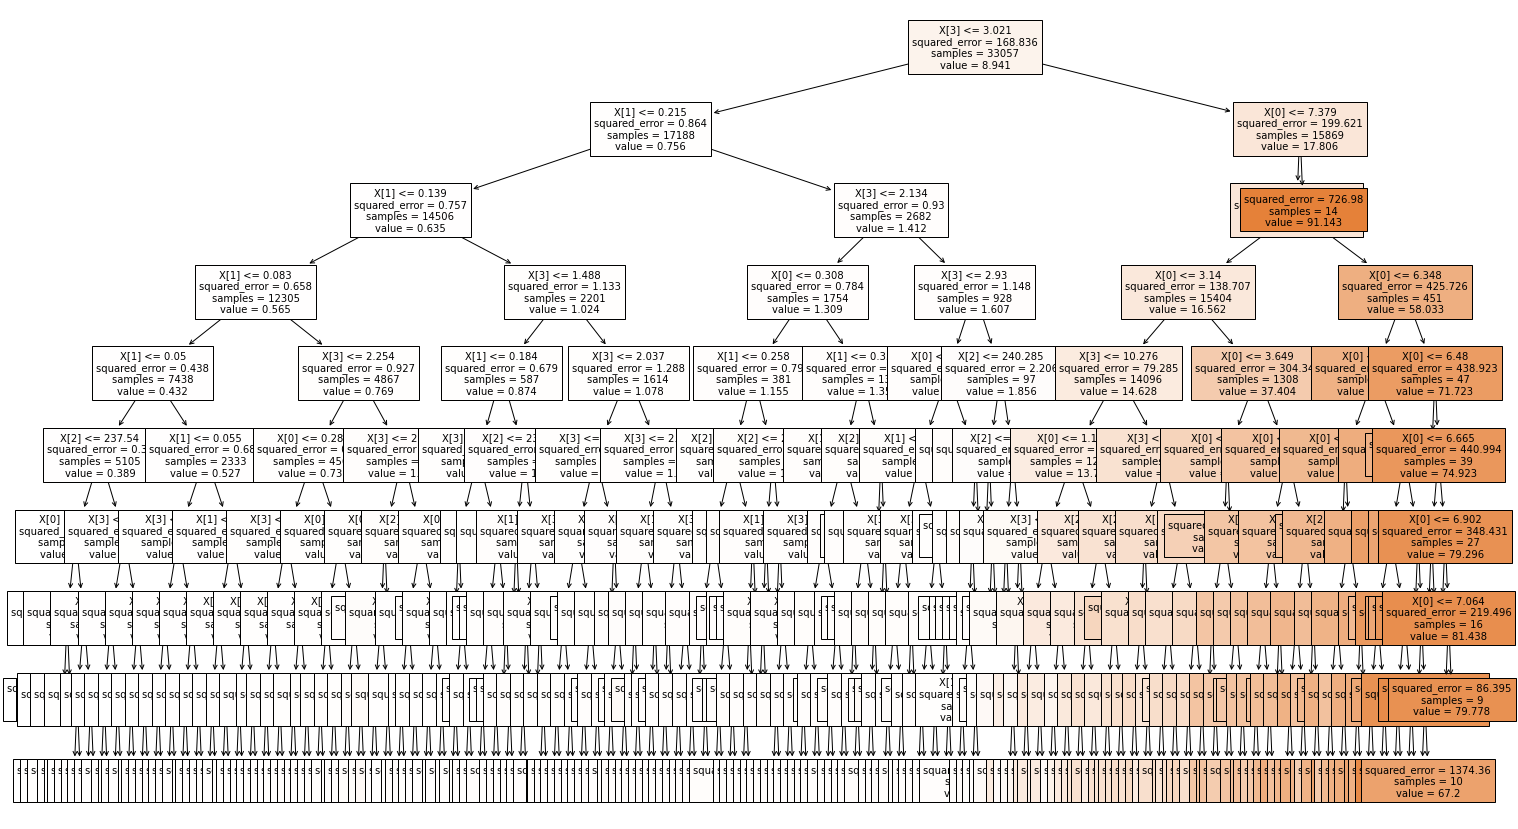

In [77]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [79]:
fig.savefig('Decision Tree Reg.png',transparent=False)

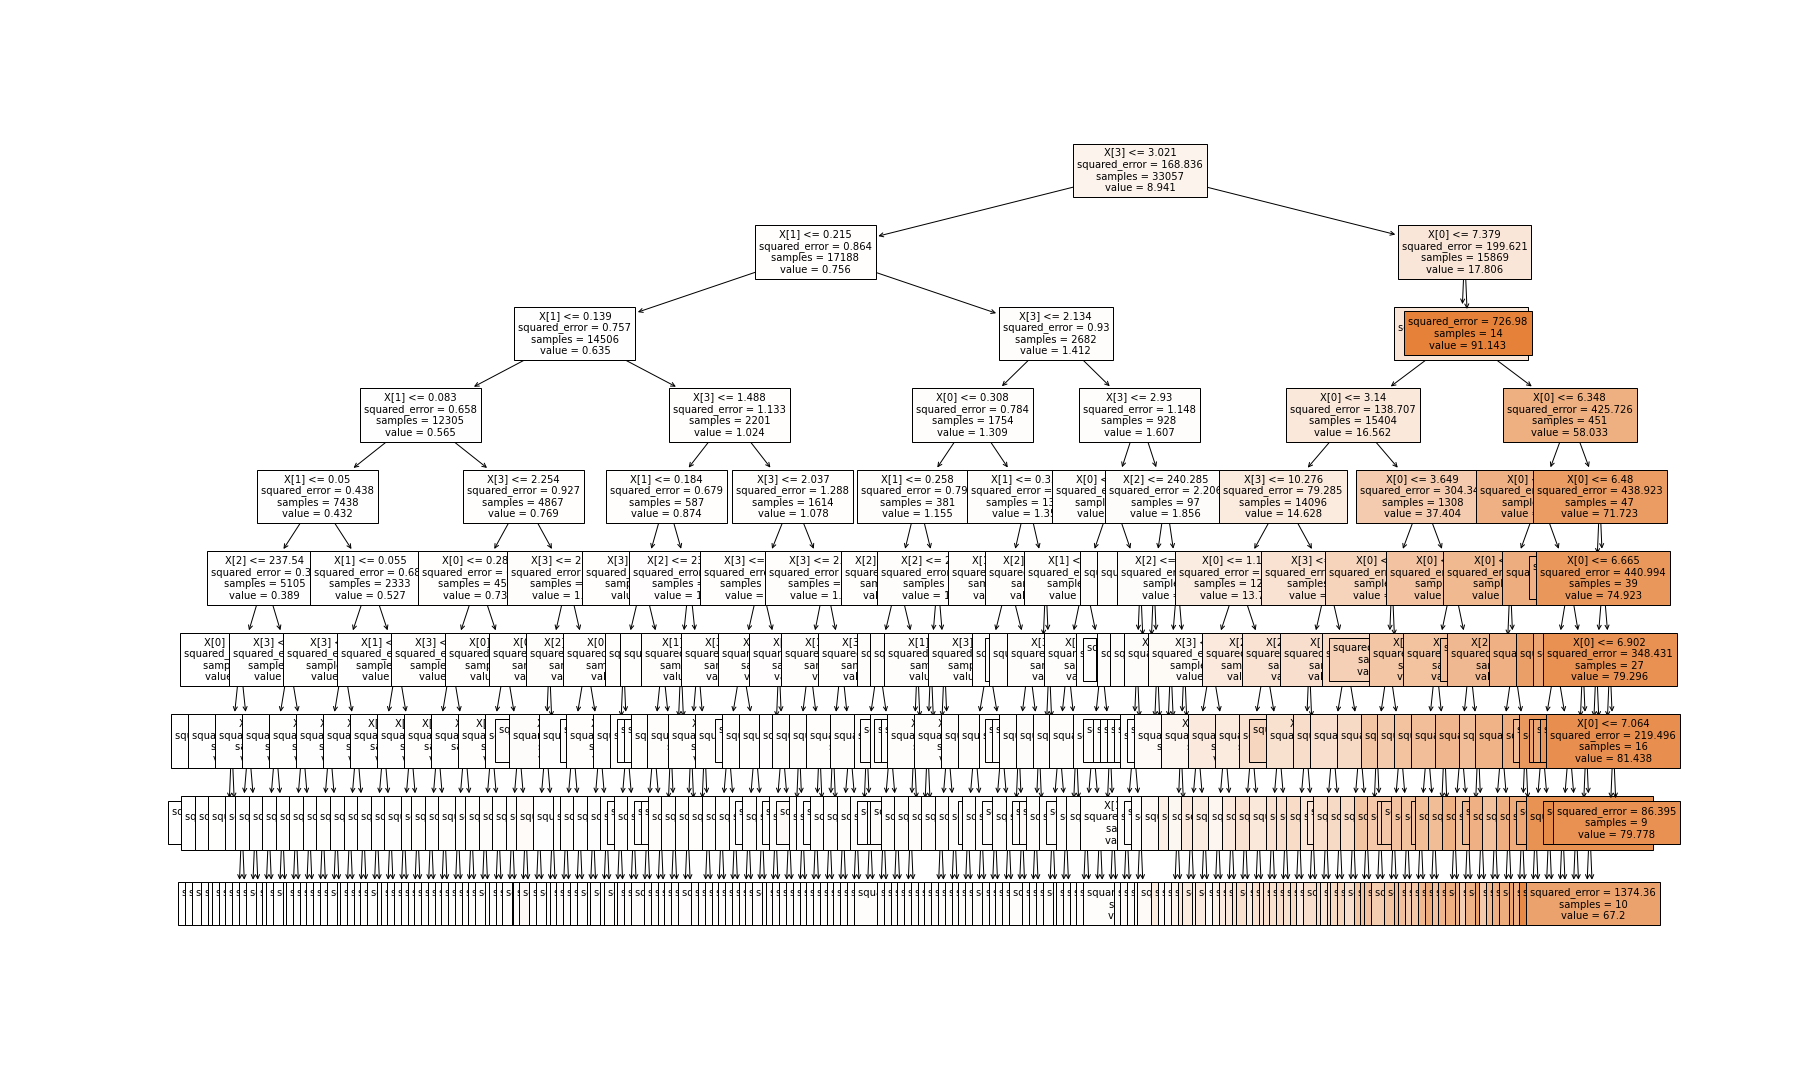

In [81]:
y_predict_gs=model_with_best_params.predict(x_test)

In [82]:
a_score_gs = r2_score(y_test, y_predict_gs) 
a_score_gs

0.7512180552303307

# <span style="color:#3cb371">The Accuracy without Hyper Parameter Tuning is 58 %

# <span style="color:#a52a2a">The Accuracy with Hyper Parameter Tuning is 75 %